<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from ipywidgets import interact, widgets, fixed

## Population Models

The simplest population model we examined was that of exponential growth.  Here, we claimed a population that grows in direct proportion to itself can be represented both in terms of discrete time steps and a continuous differential equation model, given below.

$$p_{n+1} = r p_{n} \quad \quad \frac{dP}{dt} = kP$$

Additionally, we looked at a population model that considered the limiting behavior of decreased resources through the logistic equation.  Again, we could describe this either based on a discrete model or a continuous model as show below.

$$p_{n+1} = m(L- p_n)p_n \quad \quad \frac{dP}{dt} = r P (1-P)$$

This model was interesting because of some unexpected behavior that we saw in the form of chaos.  Today, we extend our discussion to population dynamics where we investigate predator prey relationships.  Given some population of prey $x(t)$ and some population of prey $y(t)$ we aim to investigate the changes in these populations over time depending on the values of certain population parameters much like we did with the logistic model.  In general, we will be exploring variations on a theme.  The general system of equations given by:

$$\frac{dx}{dt} = f_1(t,x,y) - f_2(t,x,y)$$


$$\frac{dy}{dt} = f_3(t,x,y) - f_4(t,x,y)$$

Can be understood as describing the change in populations based on the difference between the increase in the populations ($f_1, f_3$) and the decrease in the populations ($f_2, f_4$).



### Lotka Voltera Model

An early example of a predator prey model is the Lotka Volterra model.  We can follow Lotka's argument for the construction of the model.  First, he assumed:

* In the absence of predators, prey should grow exponentially without bound
* In the absence of prey, predators population should decrease similarly

Thus, we have the following:

$$\frac{dx}{dt} = ax$$

$$\frac{dy}{dt} = -dy$$

where $a,d$ are some constants.  Next, Lotka called on the **Law of Mass Action** from chemistry.  When a reaction occurs by mixing chemicals, the law of mass action states that the rate of the reaction is proportional to the product of the quantities of the reactants.  Lotka argued that prey should decrease and that predators should increase at rates proportional to the product of numbers present.  Hence, we would have:

$$\frac{dx}{dt} = ax - bxy$$

$$\frac{dy}{dt} = cxy-dy$$

For some other constants $b$ and $c$. 

In [2]:
def predator_prey(a=2,b=1,c=1,d=5):
    # Initial populations
    rabbits = [10]
    foxes = [20]

    a = a/1000.
    b = b/10000.
    c = c/10000.
    d = d/1000.
    
    dt = 0.1

    N = 20000
    for i in range(N):
        R = rabbits[-1]
        F = foxes[-1]
        change_rabbits = dt * (a*R - b*R*F)
        change_foxes = dt * (c*R*F - d*F)
        rabbits.append(rabbits[-1] + change_rabbits)
        foxes.append(foxes[-1] + change_foxes)

    plt.figure(figsize=(12,6))
    plt.plot(np.arange(N+1),rabbits)
    
    plt.plot(np.arange(N+1),foxes)
    plt.ylim(0,100); plt.xlabel('Time'); plt.ylabel('Population')
    plt.legend(('Rabbits','Foxes'),loc='best');

### Questions

Examine the following Lotka Volterra model:

$$\frac{dx}{dt} = 0.7x - 0.3xy$$

$$\frac{dy}{dt} = 0.08xy - 0.44y$$

with $x(0) = 4$ and $y(0) = 2$. 

1. Experiment with changing the rate constants to answer the following questions:

* Describe the effect of increasing the prey birth rate.  Is this what you expected to happen? Explain.

* Describe the effect of increasing the prey death rate.  Is this what you expected to happen? Explain.

* The predator birth rate is currently much less than the prey birth rate.  What effect does having the same birth rate for both species have on the solution?

2. Experiment with the initial populations for the predators and prey.  Experiment with incorporating harvesting terms into both of the equations.  What happens when you change the harvesting rate?  Can you harvest and have the populations increase rather than decrease?  Is this what you expected? Explain.

In [3]:
interact(predator_prey,a=widgets.FloatSlider(min=0.01,max=30,step=1,value=0.7),
                       b=widgets.FloatSlider(min=0.01,max=10,step=1,value=0.3),
                       c=widgets.FloatSlider(min=0.01,max=10,step=1,value=0.08),
                       d=widgets.FloatSlider(min=0.01,max=30,step=1,value=0.44));


interactive(children=(FloatSlider(value=0.7, description='a', max=30.0, min=0.01, step=1.0), FloatSlider(value…

Now let's look at a particular example.  We will set $a,b,c,d=1, 0.1, 1.5,$ and $0.75$ respectively.  We can use the scipy `integrate` function to solve the differential equations with the initial conditions as populations of 10 rabbits and 5 foxes.

In [4]:
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [5]:
from scipy import integrate

t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X = integrate.odeint(dX_dt, X0, t)


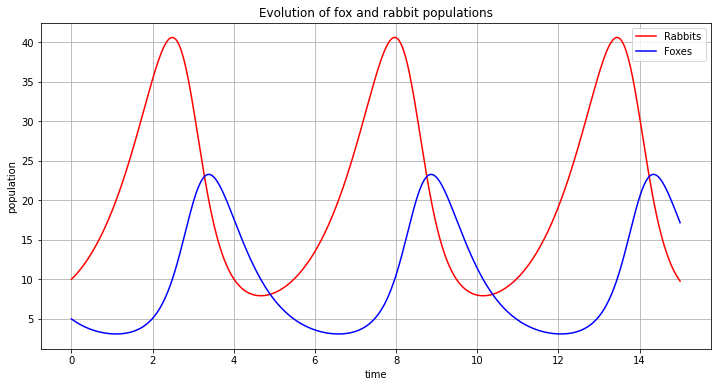

In [6]:
rabbits, foxes = X.T
f1 = plt.figure(figsize=(12,6))
plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
f1.savefig('rabbits_and_foxes_1.png')

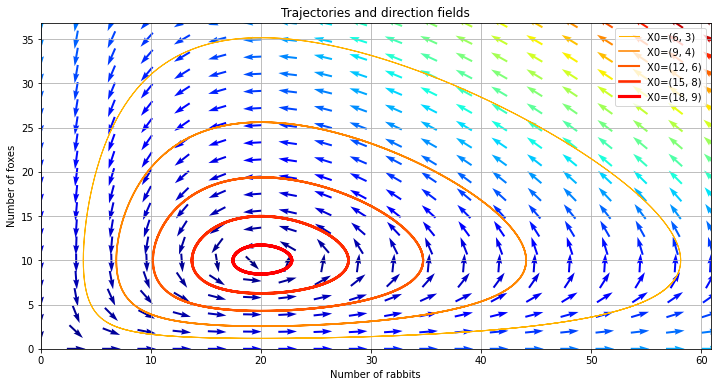

In [7]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2))

values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = plt.figure(figsize=(12,6))

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate
M[ M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

### PROBLEMS

Use the standard Lotka-Volterra model to answer the following questions:

$$\frac{dx}{dt} = ax - \alpha x y \\ \frac{dy}{dt} = -cy + \gamma x y$$

- When $y = 0$, describe the overal behavior of the system.  Interpret in the context of the problem.
- Repeat above for $x = 0$.  


### Problem 1

In the following questions, you are to verify that each given function is a solution to the given differential equation.

1. $y' = 3x^2; y = x^3 + 7$
2. $y'' + 4y = 0; y_1 = \cos(2x), y_2 = \sin(2x)$
3. $x^2 y'' + xy' - y = \ln x; y_1 = x - \ln x; y_2 = \frac{1}{x} - \ln x$

### Problem 2

In the following questions, verify that the given function is a solution to the differential equation and use the initial condition to solve for $C$.

1. $y' + y = 0; y(x) = Ce^{-x}, y(0) = 2$
2. $e^yy' = 1; y(x) = \ln(x + C), y(0) = 5$

### Problem 3

Write a differential equation that is a model of the situation described.

1. The time rate of change of a population $P$ is proportional to the square root of $P$.
2. In a city having a fixed population of $P$ persons, the time rate of change of the number $N$ of those persons who have heard a certain rumor is proportional to the number of those who have not yet heard the rumor.

### Problem 4

Find the position function of a moving particle with the given acceleration $a(t)$, initial position $x_0$ and initial velocity $v_0$.

1. $a(t) = 50, v_0 = 10, x_0 = 20$
2. $a(t) = 4(t + 3)^2, v_0 = -1, x_0 = 1$

### Problem 5

Draw a slope field for the following differential equations.  Use Euler's method to approximate solutions to each with given initial condition.

1. $y' = x + y, y(0) = 0; y(-2) = ?$
2. $y' = y - x, y(4) = 0; y(-3)?$